# Primera Parte Examen Parcial
##### Autor: Jorge Alberto Ramírez García
##### Maestría en Analítica de Datos
##### Minería de Datos

In [5]:
"""
Sección de funciones a utilizar en el proyecto y carga de librerías
"""

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga de los datos
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Descripcion de los datos: 
       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std         

<function matplotlib.pyplot.show(close=None, block=None)>

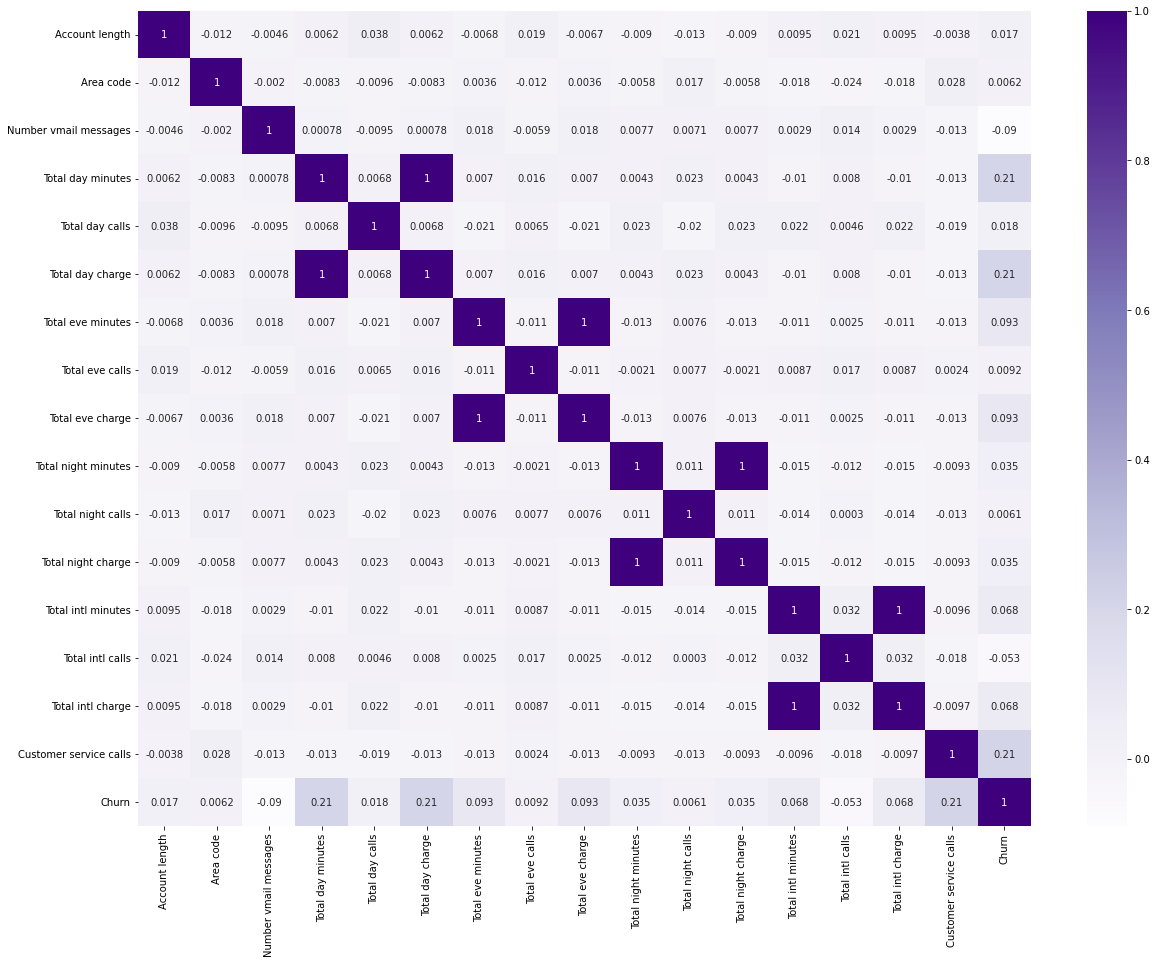

In [7]:
# Exploración de los datos

print("Descripcion de los datos: ")
print(df.describe())
print("- - - - - ")
print("Información disponible")
print(df.info())
print("- - - - -")
print("validación de nulos")
print(df.isnull().sum())
print("- - - - -")
print("Matríz de Correlación")
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show

## Interpretaciones

Por lo pronto se pueden detectar variables no numericas como State, International Plan, Voice Mail Plan y Churn.
Convertiremos International Plan, Voice Mail Plan a dicotómicas.
Las variables con mayor correlación a Churn, nuestra variable de interés, son Total Day Minutes, Total Day Charge y Customer Service Calls.
Descartaremos State ya que sería una lista de muchos estados, para cuantificalro sería una gran cantidad de características

In [13]:
df['International plan'] = df['International plan'].replace(['Yes', 'No'], [1, 0])
df['Voice mail plan'] = df['Voice mail plan'].replace(['Yes', 'No'], [1,0])

x = df.drop(
    columns=[
        'State', 
        'Churn',
    ]
)
y = df['Churn'].astype(int) # Se cambia a dicotómica 

### Predicción de 'Churn'
Aquí utilizaremos el dataset para predecir si un cliente dará de baja o no su servicio de telecomunicaciones utilizando métodos de clasificación.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Creamos nuestros conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=19)

# Ahora generamos un modelo

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_train)
print(accuracy_score(Y_train, Y_pred))

1.0


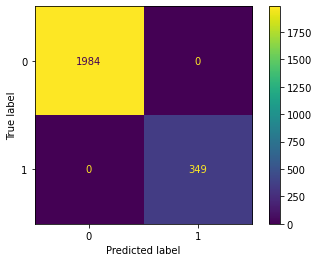

In [28]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_train, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Interpretación de resultado con conjunto de prueba
Aparentemente parece ser un modelo 'perfecto' pero pareciera estar sobreajustado, haremos la misma evaluación utilizando
el conjunto de prubeas y no de entrenamiento.

0.901


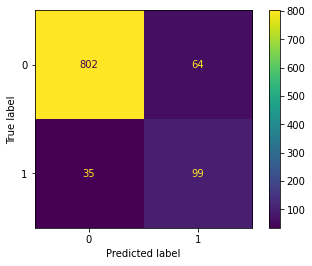

In [29]:
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm_display.plot()
plt.show()

Viendo este resultado, pudiera llegar a decirse que el modelo es bueno utilizando Decision Trees Classifier ya que tiene un 90.10% de acertividad (solo fallo 64 veces prediciendo 'False' Churn y 35 veces prediciendo 'True' Churn)